In [30]:
from matplotlib import pyplot as plt

import numpy as np
import scipy
import librosa
from librosa import display

from synchronization import synchronize

In [31]:
# file_1, file_2 = '0_3_0_2020-06-21T17:38:16.424157.wav', '0_2_0_2020-06-21T17:38:16.424138.wav'
file_1, file_2 = '2_3_0_2020-06-18T17:34:17.047124.wav', '2_4_0_2020-06-18T17:34:17.047248.wav'

In [55]:
samples_1, samples_2, sr, delay = synchronize(file_1, file_2)
samples_1, samples_2 = samples_1[21168000+2646000:26460000], samples_2[21168000+2646000:26460000]
librosa.output.write_wav('origin_1.wav', samples_1, sr=sr)
librosa.output.write_wav('origin_2.wav', samples_2, sr=sr)
samples_1, samples_2 = samples_1*3, samples_2*3

In [56]:
class FeatureExtractor:
    def __init__(self, audio, *, window_length, overlap, sample_rate):
        self.audio = audio
        self.ffT_length = window_length
        self.window_length = window_length
        self.overlap = overlap
        self.sample_rate = sample_rate
        self.window = scipy.signal.hamming(self.window_length, sym=False)

    def get_stft_spectrogram(self):
        return librosa.stft(self.audio, n_fft=self.ffT_length, win_length=self.window_length, hop_length=self.overlap,
                            window=self.window, center=True)

    def get_audio_from_stft_spectrogram(self, stft_features):
        return librosa.istft(stft_features, win_length=self.window_length, hop_length=self.overlap,
                             window=self.window, center=True)

    def get_mel_spectrogram(self):
        return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',
                                              n_fft=self.ffT_length, hop_length=self.overlap, center=True)

    def get_audio_from_mel_spectrogram(self, M):
        return librosa.feature.inverse.mel_to_audio(M, sr=self.sample_rate, n_fft=self.ffT_length,
                                                    hop_length=self.overlap,
                                                    win_length=self.window_length, window=self.window,
                                                    center=True, pad_mode='reflect', power=2.0, n_iter=1, length=None)

In [57]:
extractor_1 = FeatureExtractor(samples_1, window_length=1024, overlap=128, sample_rate=sr)

In [58]:
extractor_2 = FeatureExtractor(samples_2, window_length=1024, overlap=128, sample_rate=sr)

# STFT SPEC

In [60]:
stft_samples_1 = extractor_1.get_stft_spectrogram()
stft_samples_2 = extractor_2.get_stft_spectrogram()
stft_samples_1_dB = librosa.amplitude_to_db(np.abs(stft_samples_1), ref=np.max)
stft_samples_2_dB = librosa.amplitude_to_db(np.abs(stft_samples_2), ref=np.max)

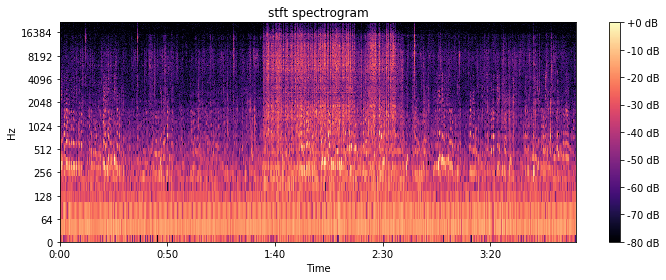

In [61]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_1_dB, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('stft spectrogram')
plt.tight_layout()
plt.savefig('Stft spectrogram file_1.png')
plt.show()

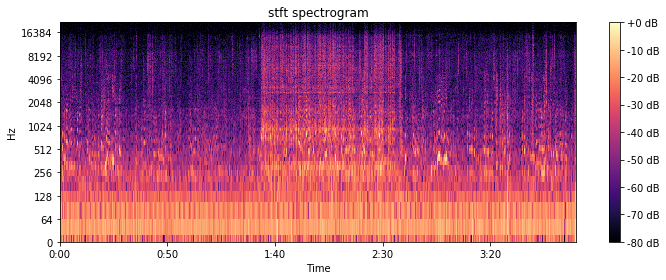

In [62]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_2_dB, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('stft spectrogram')
plt.tight_layout()
plt.savefig('Stft spectrogram file_2.png')
plt.show()

In [203]:
stft_samples_substracted_1 = stft_samples_1.copy()
stft_samples_substracted_2 = stft_samples_2.copy()
difference = np.abs(stft_samples_1 - stft_samples_2)
mask1 = difference < 0.01
mask2 = difference > 20
mask = mask1 + mask2

stft_samples_substracted_1[mask] = 0
stft_samples_substracted_2[mask] = 0

stft_samples_substracted_dB_1 = librosa.amplitude_to_db(np.abs(stft_samples_substracted_1), ref=np.max)
stft_samples_substracted_dB_2 = librosa.amplitude_to_db(np.abs(stft_samples_substracted_2), ref=np.max)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_substracted_dB_1, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Stft spectrogram')
plt.tight_layout()
plt.savefig('stft spectrogram file_substracted.png')
plt.show()

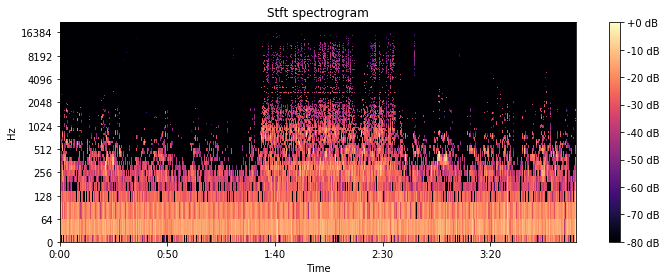

In [165]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_substracted_dB_2, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Stft spectrogram')
plt.tight_layout()
plt.savefig('stft spectrogram file_substracted.png')
plt.show()

In [202]:
samples_substracted_1 = extractor_1.get_audio_from_stft_spectrogram(stft_samples_substracted_1)
samples_substracted_2 = extractor_2.get_audio_from_stft_spectrogram(stft_samples_substracted_2)
librosa.output.write_wav('substracted_1.wav', samples_substracted_1, sr=sr)
librosa.output.write_wav('substracted_2.wav', samples_substracted_2, sr=sr)

# STFT db

In [ ]:
stft_samples_1 = extractor_1.get_stft_spectrogram()
stft_samples_2 = extractor_2.get_stft_spectrogram()
stft_samples_1_dB = librosa.amplitude_to_db(np.abs(stft_samples_1), ref=np.max)
stft_samples_2_dB = librosa.amplitude_to_db(np.abs(stft_samples_2), ref=np.max)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_1_dB, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('stft spectrogram')
plt.tight_layout()
plt.savefig('Stft spectrogram file_1.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_samples_2_dB, sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('stft spectrogram')
plt.tight_layout()
plt.savefig('Stft spectrogram file_2.png')
plt.show()

# MEL SPEC

In [7]:
mel_samples_1 = extractor_1.get_mel_spectrogram()
mel_samples_2 = extractor_2.get_mel_spectrogram()
mel_samples_1_dB = librosa.power_to_db(mel_samples_1, ref=np.max)
mel_samples_2_dB = librosa.power_to_db(mel_samples_2, ref=np.max)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_samples_1_dB, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig('Mel-frequency spectrogram file_1.png')
plt.show()

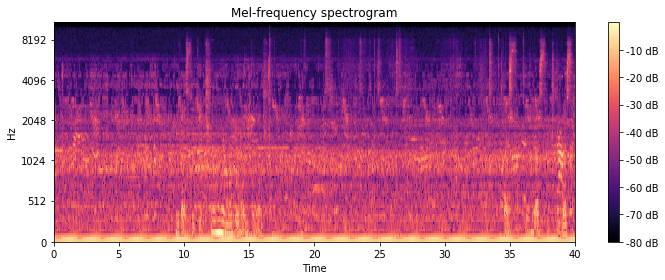

In [9]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_samples_2_dB, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig('Mel-frequency spectrogram file_2.png')
plt.show()

In [ ]:
# mel_samples_substracted = mel_samples_1 - mel_samples_2

In [28]:
# mel_samples_substracted_dB = mel_samples_1_dB.copy()
# mel_samples_substracted_dB[np.abs(mel_samples_1_dB - mel_samples_2_dB) < 1] = -80
# mel_samples_substracted = librosa.db_to_power(mel_samples_substracted_dB, ref=200)

In [8]:
mel_samples_substracted = mel_samples_1.copy()
mel_samples_substracted[np.abs(mel_samples_1 - mel_samples_2) < 0.004] = 0

In [ ]:
samples_substracted = extractor_1.get_audio_from_mel_spectrogram(mel_samples_substracted)
# preempph = librosa.effects.preemphasis(samples_substracted)
# librosa.output.write_wav('substracted1_2_preemph.wav', preempph, sr=sr)
librosa.output.write_wav('substracted1_2.wav', samples_substracted, sr=sr)
mel_samples_substracted_dB = librosa.power_to_db(mel_samples_substracted, ref=np.max)

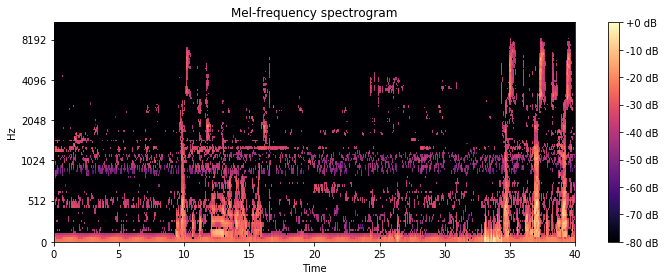

In [38]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_samples_substracted_dB, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig('Mel-frequency spectrogram file_2.png')
plt.show()